In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('pokedex.csv')
dataset.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


**Finding Outliers**

In [25]:
dataset.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,...,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,...,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,...,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


sns.boxplot() is a Seaborn function used to draw a box plot.
A box plot is a graph that shows the distribution, median, and outliers of your data.

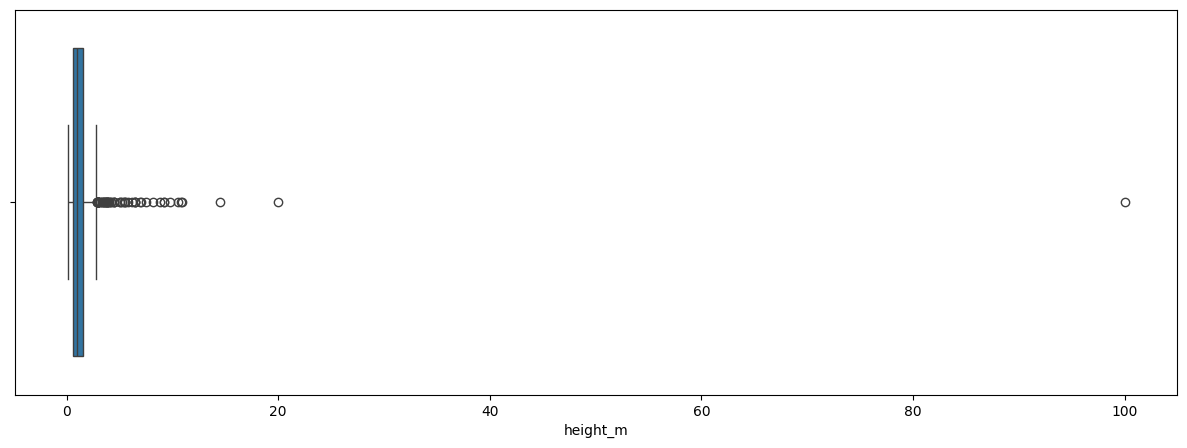

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "height_m",data=dataset)
plt.show()

sns.displot() is a Seaborn function used to plot distribution plots.

It shows how data is spread — like a histogram, KDE curve, or both.


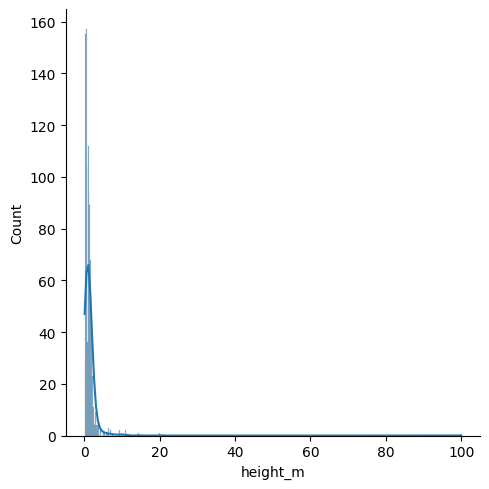

In [29]:
sns.displot(dataset["height_m"],kde=True)
plt.show()

BUT .boxplt() is better for detect outliers

**OUTLIER REMOVAL USING IQR**

In [33]:
dataset.shape

(1028, 51)

In [36]:
q1 = dataset["height_m"].quantile(0.25)
q3 = dataset["height_m"].quantile(0.75)

In [37]:
q1

np.float64(0.6)

In [38]:
q3

np.float64(1.5)

In [39]:
IQR =q3-q1

In [41]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range,max_range

(np.float64(-0.7500000000000001), np.float64(2.85))

In [54]:
new_dataset = dataset[dataset["height_m"]<=max_range]

In [56]:
new_dataset.shape

(969, 51)

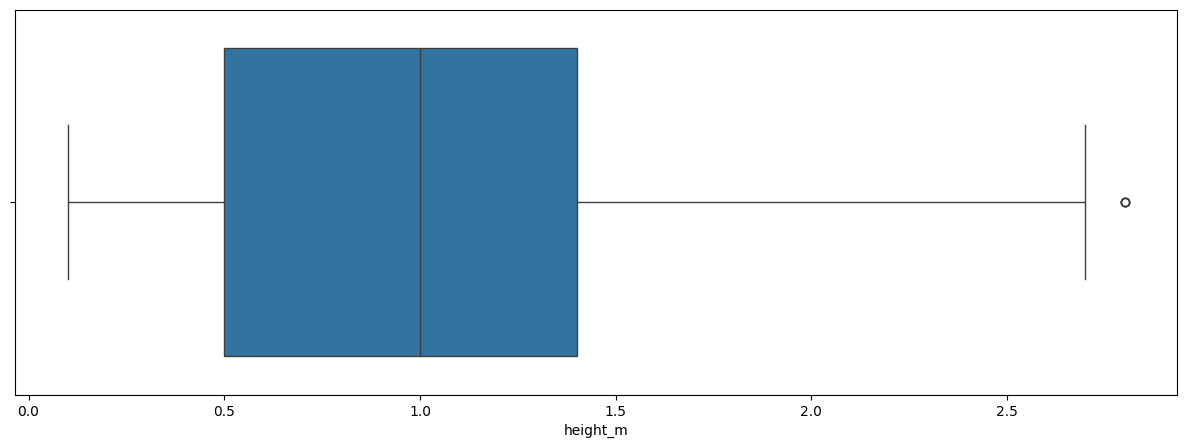

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "height_m",data=new_dataset)
plt.show()